In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


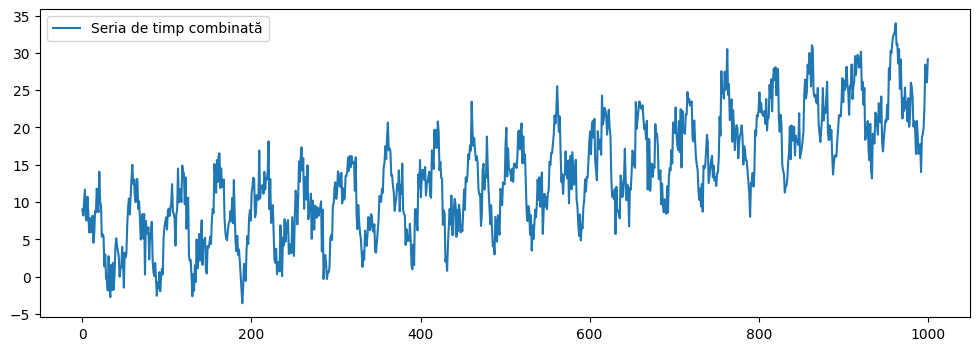

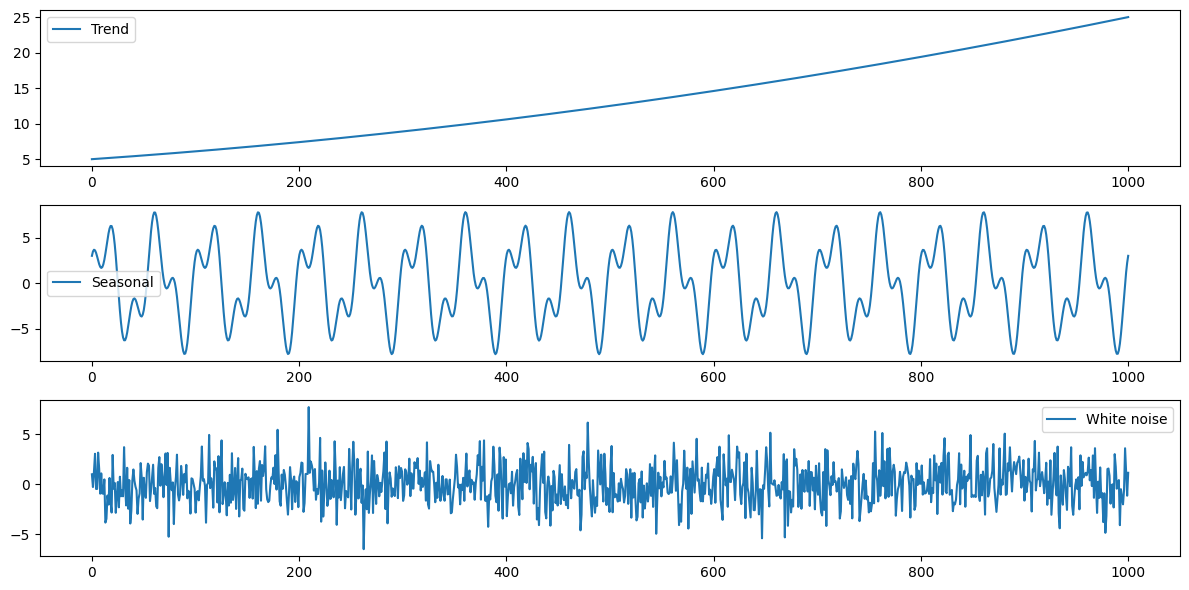

In [2]:
# a) 
np.random.seed(42)

N = 1000

t = np.linspace(0, N, N)

# Componenta trend, ecuatie de grad 2
trend =  t**2*0.00001 + 0.01*t + 5

# Componenta sezon, suma a doua functii sinusoidale
seasonal = 5 * np.sin(2 * np.pi * 0.02 * t) + 3 * np.cos(2 * np.pi * 0.05 * t)

# Variabilitatea de timp, folosind zgomot alb Gaussian
white_noise = np.random.normal(0, 2, 1000)

time_series = trend + seasonal + white_noise

plt.figure(figsize=(12, 4))
plt.plot(t, time_series, label='Seria de timp combinată')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, trend, label='Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, seasonal, label='Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, white_noise, label='White noise')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
def get_time_series():
    N = 1000
    t = np.linspace(0, N, N)
    trend =  t**2*0.00001 + 0.01*t + 5
    seasonal = 5 * np.sin(2 * np.pi * 0.02 * t) + 3 * np.cos(2 * np.pi * 0.05 * t)
    white_noise = np.random.normal(0, 2, 1000)
    time_series = trend + seasonal + white_noise
    
    return time_series

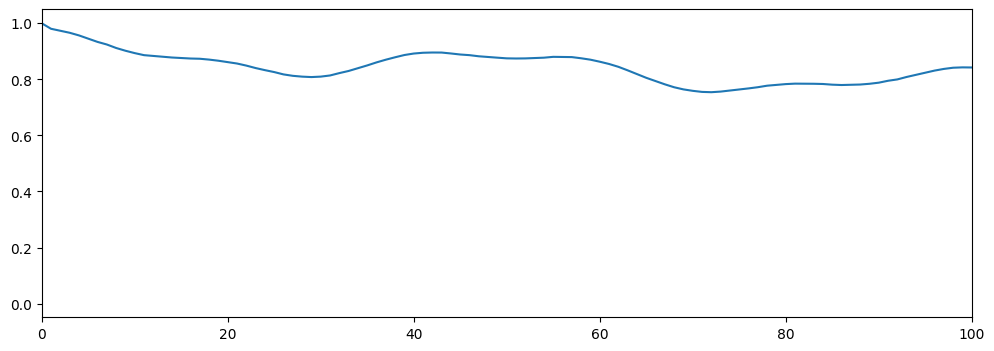

In [12]:
# b) Autocorelatia seriei de timp
time_series = get_time_series()


autocorenation = np.correlate(time_series, time_series, mode='full')

autocorenation /= np.max(autocorenation)

autocorenation = autocorenation[len(autocorenation)//2:]


plt.figure(figsize=(12, 4))
plt.plot(autocorenation)
#show only 100 lags
plt.xlim(0, 100)
plt.show()

Coefficients: const       1.158106
Value.L1    0.906697
dtype: float64


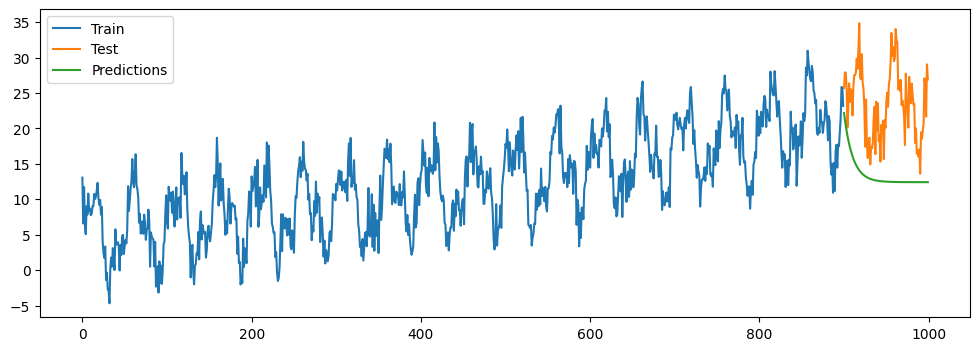

In [6]:
# c) Calcularea modelului AR
time_series = get_time_series()

df = pd.DataFrame({'Time': np.arange(len(time_series)), 'Value': time_series})
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

# AR model

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_data['Value'], lags=1)
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)

# d) Predictia modelului AR
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(12, 4))
plt.plot(train_data['Time'], train_data['Value'], label='Train')
plt.plot(test_data['Time'], test_data['Value'], label='Test')
plt.plot(test_data['Time'], predictions, label='Predictions')
plt.legend()

plt.show()
